In [ ]:
import  pandas as pd
advertising_multi=pd.read_csv('/content/Advertising Budget and Sales.csv')

In [ ]:
#looking for first 5 values
advertising_multi.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
#looking for lasts 5 values
advertising_multi.tail()


,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [ ]:
advertising_multi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
advertising_multi.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


**Visualising Data**

In [ ]:
import seaborn as sns
%matplotlib inline

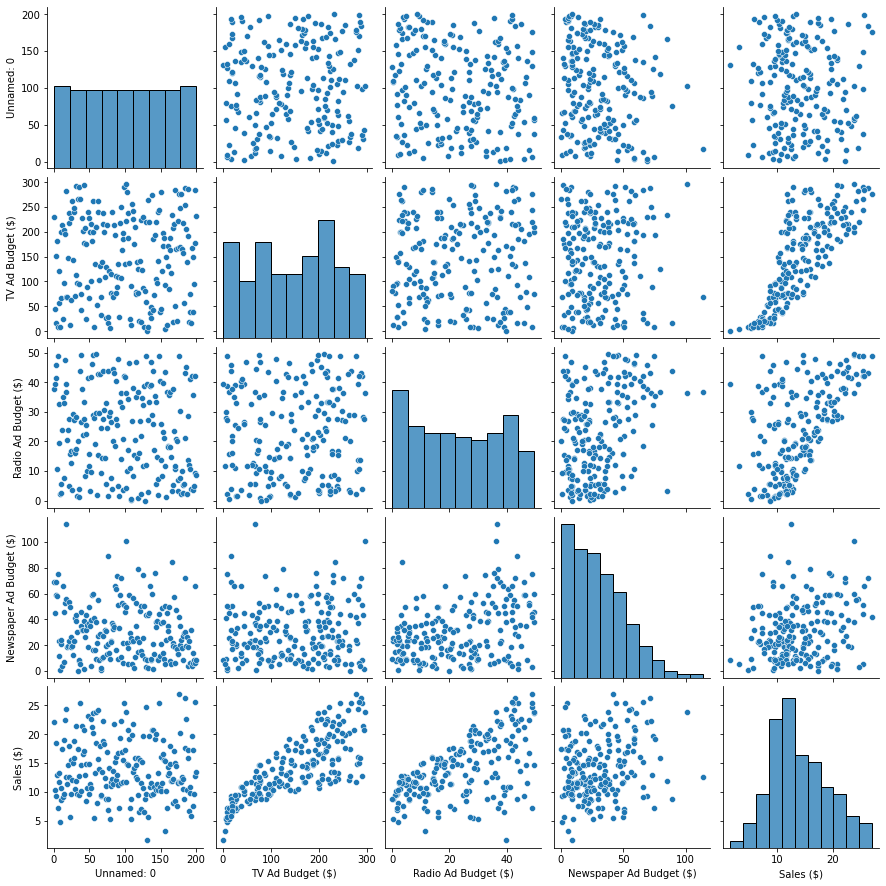

In [ ]:
sns.pairplot(advertising_multi)

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


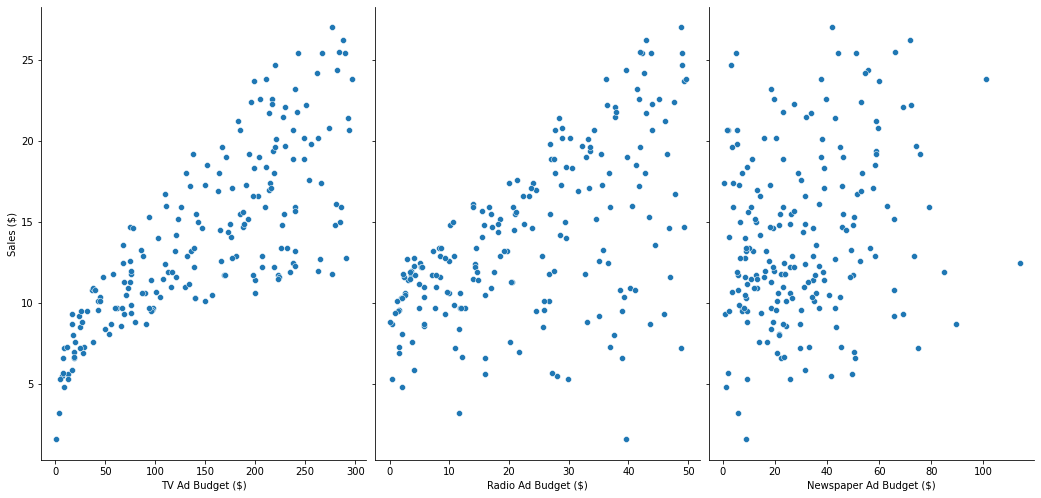

In [ ]:
sns.pairplot(advertising_multi,x_vars=['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)'],y_vars='Sales ($)',size=7,aspect=0.7)

Splitting the data for training and testing

In [27]:
import pandas as pd
advertising_multi=pd.read_csv('/content/Advertising Budget and Sales.csv')
X=advertising_multi[['TV Ad Budget ($)','Radio Ad Budget ($)','Newspaper Ad Budget ($)']]

In [28]:
y=advertising_multi['Sales ($)']

In [29]:
#model selection
from sklearn.model_selection import train_test_split

In [32]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lm=LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
print(lm.intercept_)

2.652789668879498


In [42]:
coeff_df=pd.DataFrame(lm.coef_,X_test.columns,columns=['coefficient'])
coeff_df

,coefficient
TV Ad Budget ($),0.045426
Radio Ad Budget ($),0.189758
Newspaper Ad Budget ($),0.004603


Prediction

In [43]:
y_pred=lm.predict(X_test)

Calculating Error terms

In [46]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred)
r_squared=r2_score(y_test,y_pred)

In [49]:
print('mean_squared_error:',mse)
print('r_square_value:',r_squared)

mean_squared_error: 1.8506819941636963
r_square_value: 0.9058622107532246


Checking the P-value using STATS MODEL

In [53]:
import statsmodels.api as sm
X_train_sm=X_train

In [54]:
X_train_sm=sm.add_constant(X_train_sm)
lm_l=sm.OLS(y_train,X_train_sm).fit()
lm_l.params

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


const                      2.652790
TV Ad Budget ($)           0.045426
Radio Ad Budget ($)        0.189758
Newspaper Ad Budget ($)    0.004603
dtype: float64

In [55]:
print(lm_l.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     377.6
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           9.97e-66
Time:                        06:43:47   Log-Likelihood:                -280.83
No. Observations:                 140   AIC:                             569.7
Df Residuals:                     136   BIC:                             581.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

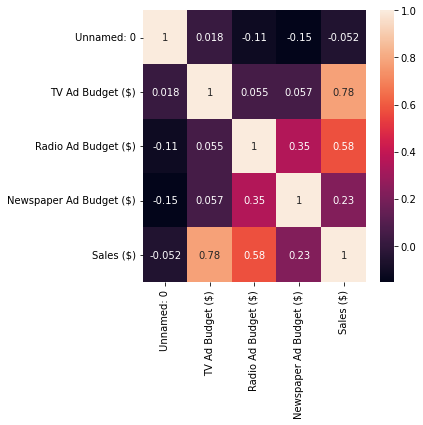

In [60]:
plt.figure(figsize=(5,5))
sns.heatmap(advertising_multi.corr(),annot=True)

Implementing the results and running thne model again

In [61]:
X_train_new=X_train[['TV Ad Budget ($)','Radio Ad Budget ($)']]
X_test_new=X_test[['TV Ad Budget ($)','Radio Ad Budget ($)']]

In [66]:
lm.fit(X_train_new,y_train)

LinearRegression()

In [67]:
y_pred_new=lm.predict(X_test_new)

Text(0, 0.5, 'Sales')

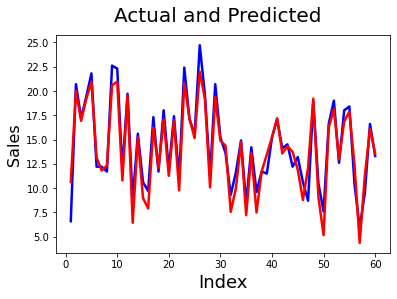

In [68]:
#Actual vspredicted
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test,color='blue',linewidth=2.5,linestyle='-')
plt.plot(c,y_pred,color='red',linewidth=2.5,linestyle='-')
fig.suptitle('Actual and Predicted',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('Sales',fontsize=16)

Text(0, 0.5, 'y_test-y_pred')

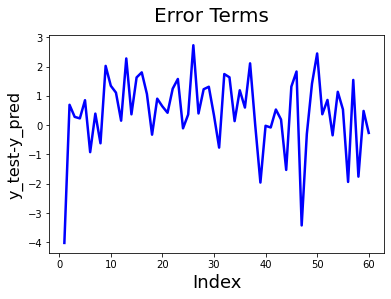

In [69]:
#Error 
c=[i for i in range(1,61,1)]
fig=plt.figure()
plt.plot(c,y_test-y_pred,color='blue',linewidth=2.5,linestyle='-')
fig.suptitle('Error Terms',fontsize=20)
plt.xlabel('Index',fontsize=18)
plt.ylabel('y_test-y_pred',fontsize=16)

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,y_pred_new)
r_squared=r2_score(y_test,y_pred_new)

In [71]:
print('mean_squared_error:',mse)
print('r_square_value:',r_squared)

mean_squared_error: 1.7847400520902805
r_square_value: 0.909216449171822


In [73]:
X_train_final=X_train_new
X_train_final=sm.add_constant(X_train_final)
lm_final=sm.OLS(y_train,X_train_final).fit()
print(lm_final.summary())

                            OLS Regression Results                            
Dep. Variable:              Sales ($)   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     568.8
Date:                Sun, 15 Jan 2023   Prob (F-statistic):           4.46e-67
Time:                        07:05:15   Log-Likelihood:                -281.03
No. Observations:                 140   AIC:                             568.1
Df Residuals:                     137   BIC:                             576.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.7190    

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
